## Before you begin, learn to write equations under Jupyter Markdown mode

First, under "help" tab, click "Keyboard Shortcuts" to view shortcut operations, or click "Markdown" to view how to edit markdown cells.

To switch between "Markdown" mode or "code" mode, click a cell you want to change, then under the tool tab (which is right above this cell) click the dropdown option which is to the left of the "keyboard" icon. 

Click Ctrl + Enter to run any cell in any mode.

In jupyter you can write equations with Latex format. Simply type equations between two signs "$".

Double click the cell to view the source code. 



# Part I Basics: Broadcasting and sigmoid function


## Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

* Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
* Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
* Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [1]:
import numpy as np

In [2]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])

In [3]:
a + b

array([5, 6, 7])

* If arrays are of same size, element to element operation takes place
* Because of broadcasting, scaler value 5 is converted into vector & ops takes place

In [4]:
a + 5

array([5, 6, 7])

In [5]:
a = np.array([ [1,2,3], [4,5,6] ])

In [6]:
a + 5

array([[ 6,  7,  8],
       [ 9, 10, 11]])

<img src="https://github.com/awantik/PythonDataScienceHandbook/raw/f2c4a8af3f6e7e5f455469839e31b09ab6c22868/notebooks/figures/02.05-broadcasting.png">

In [7]:
a = np.arange(3).reshape(3,1)

In [8]:
a

array([[0],
       [1],
       [2]])

In [9]:
b = np.arange(3)

In [10]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Now lets initiate a matrix M and a vector a. Notice that the length of the vector a has to match the last dimension of M (or the dimension 1)

In [11]:
M = np.ones((2, 3))
a = np.arange(3)

In [12]:
M.shape, M

((2, 3),
 array([[1., 1., 1.],
        [1., 1., 1.]]))

In [13]:
a.shape

(3,)

In [14]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [15]:
a + M

array([[1., 2., 3.],
       [1., 2., 3.]])

In [16]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2,3],[4,5,6],[7,8,9]])



In [17]:
# will this work? why?
a + b

ValueError: operands could not be broadcast together with shapes (2,3) (3,3) 

In [18]:
a = a.reshape(1,2,3)
b = b.reshape(3,1,3)

In [19]:
a, b

(array([[[1, 2, 3],
         [4, 5, 6]]]),
 array([[[1, 2, 3]],
 
        [[4, 5, 6]],
 
        [[7, 8, 9]]]))

In [20]:
# will this work? why?

a + b

array([[[ 2,  4,  6],
        [ 5,  7,  9]],

       [[ 5,  7,  9],
        [ 8, 10, 12]],

       [[ 8, 10, 12],
        [11, 13, 15]]])

**Practice time !!**

First let M be a zero matrix of size 4 * 3, $a$ be an array of size (3, ) with elements ranging from 0 to 2, $b$ be an array of size (4, ) with elements ranging from 1 to 4. 

In [21]:
# Question 1
M = np.zeros((4,3))

a = np.arange(3)
b = np.arange(1,5)

In [22]:
print(M)
print("-------")
print(a)
print("-------")
print(b)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
-------
[0 1 2]
-------
[1 2 3 4]


Now, let's add $a$ to each row of M and assign the resulting matrix to N

In [23]:
# Question 2
N = M + a
N

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

Finally, add $b$ to each column of N using broadcast. There are multiple ways to do it. You can try np.newaxis or reshape. 

In [24]:
# Question 3
N = N+b.reshape((4,1))

In [25]:
N

array([[1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.],
       [4., 5., 6.]])

## Sigmoid function and np.exp() function


**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="images/Sigmoid.png" style="width:500px;height:228px;">

To refer to a function belonging to a specific package you could call it using package_name.function(). Run the code below to see an example with math.exp().

**Exercise**: Implement the sigmoid function and its derivative using numpy. 

**Instructions**: When you call a function, say exponential on an array, numpy allows for element-wise operation over the whole array.
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [26]:
# run this

a = np.random.rand(3) # This initiate an random arry

In [27]:
b = np.exp(-a)
b

array([0.74149521, 0.54266982, 0.56783204])

In [28]:
# wrtie your code for sigmoid here



def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+ np.exp(-x))
    
    return s

In [29]:
sigmoid(a)

array([0.57421921, 0.64822685, 0.63782342])

**Excercise** Define a class named My_Sigmoid Within the class, define two methods forward and backward. The forward method will take an input array $x$ and calculate its sigmoid transformation. The backward will calculate the derivative of sigmoid function at $x$

**Instruction** The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [30]:
class My_Sigmoid:
    '''
    forward: compute the sigmoid(x) given x, x can be a list or a numpy array or a value, if x is a list, then perform element 
    wise transformation.
    
    backward: compute the derivative of sigmoid(x), using the fomula above
    
    '''
    def __init__(self, x):
        if x is None:
            self.y= 0
            self.dy = 0
        else:
            x = np.array(x)
            self.y = 1/(np.exp(-x) + 1)
            self.dy = self.y*(1-self.y)

    def forward(self, x):
        x = np.array(x)
        #######one line code here#######
        self.y = 1/(1 + np.exp(-x))
        return self.y
    def backward(self, x):
        x = np.array(x)
        #######one line code here#######
        self.y = mysigmoid.forward(x)
        #######one line code here#######
        self.dy = self.y * (1 - self.y)
        
        
        return self.dy
        
    

In [31]:
# test:
mysigmoid= My_Sigmoid(x = None)

mysigmoid.forward([10, -10, 0, 2])
print(mysigmoid.y)
mysigmoid.backward([10, -10, 0, 2])

[9.99954602e-01 4.53978687e-05 5.00000000e-01 8.80797078e-01]


array([4.53958077e-05, 4.53958077e-05, 2.50000000e-01, 1.04993585e-01])

## Reshaping arrays

Two common numpy functions used in deep learning are [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html). 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

*Credit for the picture: Andrew Ng Deep Learning*

<img src="images/image2vector_kiank.png" style="width:500px;height:300;">

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:
``` python
v = v.reshape((v.shape[0]*v.shape[1], v.shape[2])) # v.shape[0] = a ; v.shape[1] = b ; v.shape[2] = c
```
- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc. 

In [32]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    v = image.reshape((image.shape[0] * image.shape[1] * image.shape[2], 1))
    
    return v




In [33]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

vectorized_image = image2vector(image)

print ("image2vector(image) = " + str(vectorized_image))

image2vector(image) = [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


**Exercise**: Implement `vector2image()` that takes the above vector and reshape it back to an image, but this time of the shape (length\*height ,depth).

In [34]:
def vector2image(vec, shape):
    """
    Argument:
    vec -- a flattened image vector of shape (length*height*depth, 1)
    shape -- a array indicating desired shape
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    image = vec.reshape(shape[0], shape[1])
    
    return image

In [35]:
# call the function, fill in the right shape

image_new = vector2image(vectorized_image, shape =(image.shape[0] * image.shape[1] , image.shape[2]) )
print ("vector2image(vectorized_image ) = " + str(image_new))

vector2image(vectorized_image ) = [[0.67826139 0.29380381]
 [0.90714982 0.52835647]
 [0.4215251  0.45017551]
 [0.92814219 0.96677647]
 [0.85304703 0.52351845]
 [0.19981397 0.27417313]
 [0.60659855 0.00533165]
 [0.10820313 0.49978937]
 [0.34144279 0.94630077]]


# Part II Logistic Regression with a Neural Network mindset

This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.


Implement  a gradient descent algorithm for logistic regression .This data are taken from a larger dataset, described in a South African Medical Journal.

**Dataset: Use the following dataset for the implementation.**

The full data is available at: http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/ For this project, you can use those located under in the folder. 


#### Description
A retrospective sample of males in a heart-disease high-risk region of South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases, the measurements were made after these treatments.
 
### Steps to implement

*	Encode the categorical variables.
*	Normalize the numerical variables
*	Randomly initialize beta values
*	Define a sigmoid function to predict Y
* Define a function for calculating binary cross entropy loss function 
* Define a function for updating beta values. The derivative term is same as derivative term for the linear regression as discussed in the class.
* Write the code for gradient descent iterations.
* Plot the cost function for different alpha (learning parameters) values.
* Use sklearn logistic regression API and compare the estimation of beta values.


### Important! 

Read the codes and comments carefully. You may need to fill in the code when you see "################finish the code below##################" in the comment line. Do not miss them.


## 1 - Packages ##


If you don't have those packages, try pip/conda install *-insert package name-*

In [36]:
#Load required libraries
import pandas as pd
import numpy as np
import math

%matplotlib inline

## 2 - Overview of the Problem set ##




In [37]:
#load SAHeart csv file
SAHeart_df = pd.read_csv('SAHeart.csv')

In [38]:
SAHeart_df.head(10)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,6,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
6,7,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
7,8,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
8,9,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0
9,10,132,0.00,5.80,30.96,Present,69,30.11,0.00,53,1


In [39]:
SAHeart_df.tail(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
452,454,154,5.53,3.20,28.81,Present,61,26.15,42.79,42,0
453,455,124,1.60,7.22,39.68,Present,36,31.50,0.00,51,1
454,456,146,0.64,4.82,28.02,Absent,60,28.11,8.23,39,1
455,457,128,2.24,2.83,26.48,Absent,48,23.96,47.42,27,1
456,458,170,0.40,4.11,42.06,Present,56,33.10,2.06,57,0
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.00,4.82,33.41,Present,62,14.70,0.00,46,1


## 3 - Process variables ##

### Convert 'famhis' to dummies

In [40]:
SAHeart_df= SAHeart_df.join(pd.get_dummies(SAHeart_df["famhist"]))
SAHeart_df = SAHeart_df.drop(labels=['famhist', 'Present'],axis=1)
# If famhist = 'Absent', then famhist = 1, otherwise famhist = 0.

In [41]:
SAHeart_df.tail()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,Absent
457,459,214,0.4,5.98,31.72,64,28.45,0.00,58,0,1
458,460,182,4.2,4.41,32.10,52,28.61,18.72,52,1,1
459,461,108,3.0,1.59,15.23,40,20.09,26.64,55,0,1
460,462,118,5.4,11.61,30.79,64,27.35,23.97,40,0,1
461,463,132,0.0,4.82,33.41,62,14.70,0.00,46,1,0


In [42]:
# Rename the columns label. Change 'Absent' to 'famhist' dummy variable.
SAHeart_df.rename(columns = {'Absent' : 'famhist'}, inplace = True)

In [43]:
SAHeart_df.head(10)


,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0
5,6,132,6.20,6.47,36.21,62,30.77,14.14,45,0,0
6,7,142,4.05,3.38,16.20,59,20.81,2.62,38,0,1
7,8,114,4.08,4.59,14.60,62,23.11,6.72,58,1,0
8,9,114,0.00,3.83,19.40,49,24.86,2.49,29,0,0
9,10,132,0.00,5.80,30.96,69,30.11,0.00,53,1,0


In [44]:
X = (SAHeart_df[['famhist','sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']])

In [45]:
X[0:5]


,famhist,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,0,118,0.08,3.48,32.28,52,29.14,3.81,46
3,0,170,7.50,6.41,38.03,51,31.99,24.26,58
4,0,134,13.60,3.50,27.78,60,25.99,57.34,49


In [46]:
Y = np.array(SAHeart_df[['chd']])
#Y = (SAHeart_df[['chd']])
#print(len(Y))

In [47]:
Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

In [48]:
cols_to_Normal = ['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']

X_new= X[cols_to_Normal]
X_new.head(10)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49
5,132,6.20,6.47,36.21,62,30.77,14.14,45
6,142,4.05,3.38,16.20,59,20.81,2.62,38
7,114,4.08,4.59,14.60,62,23.11,6.72,58
8,114,0.00,3.83,19.40,49,24.86,2.49,29
9,132,0.00,5.80,30.96,69,30.11,0.00,53


#### Normalise the dimension

In [49]:
X_new = X_new[cols_to_Normal].apply( lambda rec:(rec - rec.mean())/rec.std(), axis =0)

In [50]:

type(X_new)

pandas.core.frame.DataFrame

In [51]:
X_new['famhist'] = SAHeart_df['famhist']

In [52]:
X_new.head(10)
list(X_new)

['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist']

In [53]:
X_new = np.array(X_new)
X_new[0:5]

array([[ 1.05741729,  1.8210988 ,  0.47789413, -0.29518321, -0.41801699,
        -0.17659445,  3.27418871,  0.62865426,  0.        ],
       [ 0.27678925, -0.78938174, -0.15950708,  0.41169419,  0.19313443,
         0.67064592, -0.61208112,  1.38161701,  1.        ],
       [-0.99173133, -0.77414124, -0.6085852 ,  0.8833742 , -0.11244128,
         0.73472292, -0.54059729,  0.2179473 ,  0.        ],
       [ 1.54530982,  0.84135214,  0.80625232,  1.62238239, -0.21429985,
         1.41109128,  0.2947424 ,  1.03936121,  0.        ],
       [-0.21110328,  2.16945317, -0.59892761,  0.30501996,  0.70242729,
        -0.01284211,  1.64599115,  0.42330078,  0.        ]])

In [54]:
X_new.shape

(462, 9)

## 4- Randomly Initialising values of beta coefficient ## 

In [55]:
import random

In [56]:
def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 




In [57]:
b,w = initialize_betas(X_new.shape[1])
print(b,w)

0.5685537051940374 [0.68286358 0.3776644  0.69823257 0.23433112 0.61337348 0.81984558
 0.77348627 0.10434849 0.8914872 ]


In [58]:

w.shape

(9,)

## 5- Define a sigmoid function to predict Y ##

In [59]:
def sigmoid(b, w ,X_new):
    '''
    Z= wx+b
    '''
    
    ##############finish the code here#####################
    Z = np.dot(X_new, w ) + b
    Sigmoid_Z = 1 / (1 + np.exp(-Z))
    return  Sigmoid_Z

In [60]:
y_hat = sigmoid(b,w,X_new)

y_hat[0:5]

array([0.98833996, 0.84224815, 0.38202256, 0.98588819, 0.93305877])

In [61]:

Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

In [62]:
Y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

## 6- Define a function for calculating binary cross entropy loss function ##

In [63]:
def get_cost( y, y_hat):
    
    '''
    Input: y: a vector of true labels, y_hat: a vector of predicted outcome from logistic regression
    Return: the value of cost or loss function
    Loss function L = -1/m\Sigma (y log y_hat + (1-y)log 1-y_hat)
    
    
    '''
    
    ### finish the code here
    loss = - np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))/y.shape[0]
    
    return loss

In [64]:
# Reshape Y
Y=Y.reshape(len(Y), )
current_cost= get_cost(Y,y_hat)
#print(current_cost)
Y.shape, y_hat.shape

((462,), (462,))

In [65]:
X_new.shape

(462, 9)

## 7- Define a function for updating w and b using backpropagation

In [66]:
# write backpropagation function here

def backprop (b_0, w_0 , y , y_hat, X_new, alpha = 0.1):
    '''
    Input: weight to be updated b_0, and w_0, as well as y and y_hat to calculate dz (defined as dL/dz)
    output: new updated b_0 and w_0
    
    
    '''
    dz = y_hat-y
    ########finish the code here, to calculate db defined as dL/db
    db = np.sum(dz)/y.shape[0]
    
    # update b_0
    b_0 = b_0 - alpha * db
    
    
    ########finish the code here, , to calculate db defined as dL/db
    dw = np.dot(dz.T, X_new)/y.shape[0]
    
    #update w_0
    w_0 = w_0 - alpha * dw
   
   
    return b_0,w_0
    

In [67]:
X_new.shape

(462, 9)

In [68]:
alpha = 0.1

type(y_hat)
#(X_new).shape

numpy.ndarray

In [69]:
b,w = backprop (b,w, Y, y_hat,X_new, alpha)

b.shape

()

In [70]:
b

0.5392337331886381

In [71]:
#print(b,w)
w

array([0.67689848, 0.37935624, 0.69444912, 0.22433213, 0.60933634,
       0.80401551, 0.76421198, 0.10613973, 0.8681401 ])

##  8- Finally, let's try the gradient descent!


In [72]:
num_iterations = 500
alpha = 0.5

all_costs = []
b,w = initialize_betas(X_new.shape[1])
print("initial guess of b and w: " , b ,w)

for each_iter in range (num_iterations ):
    ###### finish the code below
    y_hat = sigmoid(b,w,X_new)
    current_cost = get_cost(Y,y_hat)
    prev_b = b
    prev_w = w
    b, w = backprop (prev_b, prev_w, Y, y_hat,X_new, alpha)
    all_costs.append(current_cost)
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost: ', current_cost)
        each_iter += 1
    
#print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
print("Final estimates of b and q are: ", b,w)

initial guess of b and w:  0.8135413952865866 [0.67467834 0.44799528 0.75524346 0.8193404  0.87323671 0.92205084
 0.90368817 0.20712673 0.08040002]
Iteration:  0 Cost:  1.1235819658179953
Iteration:  10 Cost:  0.589786959902852
Iteration:  20 Cost:  0.5223673728628698
Iteration:  30 Cost:  0.5140342593297114
Iteration:  40 Cost:  0.5121161120787974
Iteration:  50 Cost:  0.5114695780462635
Iteration:  60 Cost:  0.5112051071115653
Iteration:  70 Cost:  0.5110870479240975
Iteration:  80 Cost:  0.511031875208611
Iteration:  90 Cost:  0.5110051615718628
Iteration:  100 Cost:  0.5109917310585275
Iteration:  110 Cost:  0.510984671812462
Iteration:  120 Cost:  0.5109807659628048
Iteration:  130 Cost:  0.5109784828573557
Iteration:  140 Cost:  0.5109770751502772
Iteration:  150 Cost:  0.5109761654535522
Iteration:  160 Cost:  0.5109755549327676
Iteration:  170 Cost:  0.5109751334401028
Iteration:  180 Cost:  0.5109748365605642
Iteration:  190 Cost:  0.5109746245780742
Iteration:  200 Cost:  0.5

## 9- Let's validate our result against sklearn logistic regression API

In [73]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
lmodel = lreg.fit(X_new, Y)

In [74]:
lmodel.intercept_

array([-0.35563668])

In [75]:
lmodel.coef_

array([[ 0.13250588,  0.36074464,  0.3561588 ,  0.14243272,  0.37963858,
        -0.25523773,  0.00444212,  0.64962484, -0.88057699]])

## 10- Visualization using matplotlib

In [76]:


import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

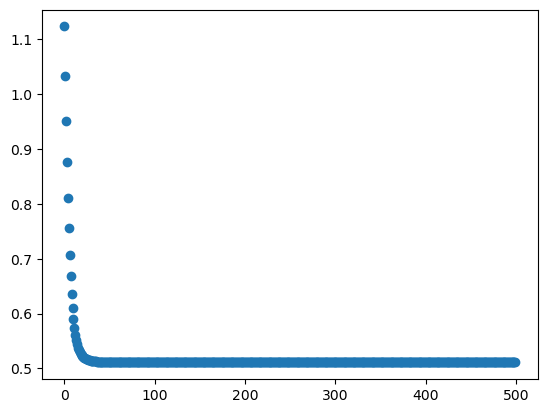

In [77]:
plt.scatter( range(num_iterations), all_costs)

#len(range(each_iter))

### Gradient descent is converging correctly for 500 iterations and with learning rate =0.5

## 11- Tuning learning rate alpha

current learning rate is 0.01
initial guess of b and w:  0.24602852419434018 [0.13328034 0.68833151 0.76672845 0.69324465 0.20385939 0.36738247
 0.73938839 0.63844865 0.23711801]
Iteration:  0 Cost:  0.8668244038369632
Iteration:  30 Cost:  0.8248677055759897
Iteration:  60 Cost:  0.7864862240317503
Iteration:  90 Cost:  0.7516865307975718
Iteration:  120 Cost:  0.7204203703744122
Iteration:  150 Cost:  0.6925834853943287
Iteration:  180 Cost:  0.6680187340787032
Iteration:  210 Cost:  0.646523246285408
Iteration:  240 Cost:  0.627858728327675
Iteration:  270 Cost:  0.6117635960725168
Iteration:  300 Cost:  0.5979654714756857
Iteration:  330 Cost:  0.5861927168309452
Iteration:  360 Cost:  0.5761840316621805
Iteration:  390 Cost:  0.5676955881675981
Iteration:  420 Cost:  0.5605056172901494
Iteration:  450 Cost:  0.5544166926805183
Iteration:  480 Cost:  0.5492561560731698
Iteration:  510 Cost:  0.5448751930262856
Iteration:  540 Cost:  0.54114703851658
Iteration:  570 Cost:  0.5379647

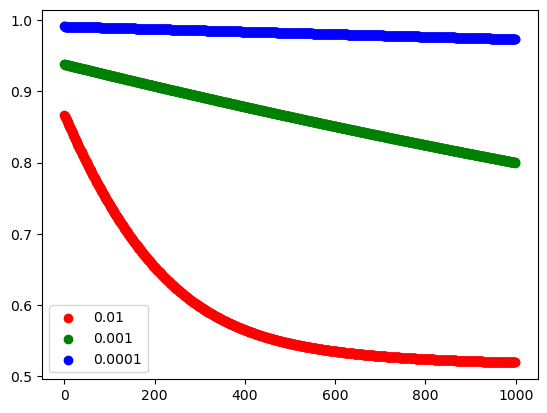

In [78]:
####plot the cost function for different alpha values, 0.01,0.001,0.0001

# For alpha =0.01

alphas = [0.01, 0.001, 0.0001]
num_iterations = 1000
colors = ['r', 'g', 'b']
for i, alpha in enumerate(alphas):
    print(f'current learning rate is {alpha}')

    all_costs = []
    b,w = initialize_betas(X_new.shape[1])
    print("initial guess of b and w: " , b ,w)

    for each_iter in range (num_iterations ):
        ################finish the code below##################
        y_hat = sigmoid(b,w,X_new)
        current_cost = get_cost(Y,y_hat)
        prev_b = b
        prev_w = w
        
        ################finish the code below##################
        b, w = backprop (prev_b, prev_w, Y, y_hat,X_new, alpha)
        all_costs.append(current_cost)
        if each_iter % 30 == 0:
            print('Iteration: ', each_iter, 'Cost: ', current_cost)
            each_iter += 1

    #print('b_0:', b_0, 'b_1:',b_1,'b_2:',b_2,'b_3:',b_3,'b_4:', b_4, 'b_5:',b_5,'b_6:',b_6,'b_7:',b_7,'b_8:',b_8,'b_9:',b_9)
    print("Final estimates of b and q are: ", b,w)
    plt.scatter( range(num_iterations), all_costs, c = colors[i], label = f'{alpha}')
    plt.legend()

According to the experiment above, which is the best choice for alpha? Why?

**Answer Below**:


### Answer: 
#### 0.01 is the best alpha.
#### (1)when alpha is equal to 0.01, the model converges to best alpha quicker than the others alphas(0.001, 0.0001)
#### (2)the model achieves smaller cost under given number of iterations.